In [53]:
import numpy as np
import pandas as pd
import time

In [54]:
df= pd.read_csv('/content/Social_Network_Ads.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [55]:
## We donot require first 2 columns so we will remove them

df = df.iloc[:, 2:]
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [56]:
## Spliting the data

x = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [57]:
## Feature Scaling

from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
x_scaled = ss.fit_transform(x)
x_scaled

array([[-1.78179743, -1.49004624],
       [-0.25358736, -1.46068138],
       [-1.11320552, -0.78528968],
       [-1.01769239, -0.37418169],
       [-1.78179743,  0.18375059],
       [-1.01769239, -0.34481683],
       [-1.01769239,  0.41866944],
       [-0.54012675,  2.35674998],
       [-1.20871865, -1.07893824],
       [-0.25358736, -0.13926283],
       [-1.11320552,  0.30121002],
       [-1.11320552, -0.52100597],
       [-1.6862843 ,  0.47739916],
       [-0.54012675, -1.51941109],
       [-1.87731056,  0.35993973],
       [-0.82666613,  0.30121002],
       [ 0.89257019, -1.3138571 ],
       [ 0.70154394, -1.28449224],
       [ 0.79705706, -1.22576253],
       [ 0.98808332, -1.19639767],
       [ 0.70154394, -1.40195167],
       [ 0.89257019, -0.60910054],
       [ 0.98808332, -0.84401939],
       [ 0.70154394, -1.40195167],
       [ 0.79705706, -1.37258681],
       [ 0.89257019, -1.46068138],
       [ 1.08359645, -1.22576253],
       [ 0.89257019, -1.16703281],
       [-0.82666613,

In [58]:
## Building DDN

import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [59]:
model = Sequential()
model.add(Dense(10,activation='relu', input_dim=2))
model.add(Dense(10,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 10)                30        
                                                                 
 dense_22 (Dense)            (None, 10)                110       
                                                                 
 dense_23 (Dense)            (None, 1)                 11        
                                                                 
Total params: 151 (604.00 Byte)
Trainable params: 151 (604.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Batch Gradient Descent , Mini Batch Gradient Descent and  Stochastic Gradient Descent


In [61]:
# Stochastic Gradient Descemt > batch_size = 1

model.compile(loss = 'binary_crossentropy', metrics = 'accuracy')
start = time.time() ## To capture Start Time
history = model.fit(x_scaled, y , epochs = 50, batch_size=1, validation_split = 0.2)
print(time.time()- start) # To calculate Total Time

Epoch 1/50
320/320 [==============================] - 2s 4ms/step - loss: 0.4482 - accuracy: 0.8219 - val_loss: 0.5985 - val_accuracy: 0.6375
Epoch 2/50
320/320 [==============================] - 1s 4ms/step - loss: 0.3141 - accuracy: 0.8625 - val_loss: 0.4773 - val_accuracy: 0.8500
Epoch 3/50
320/320 [==============================] - 2s 5ms/step - loss: 0.2836 - accuracy: 0.8687 - val_loss: 0.4106 - val_accuracy: 0.9125
Epoch 4/50
320/320 [==============================] - 1s 3ms/step - loss: 0.2734 - accuracy: 0.8750 - val_loss: 0.3611 - val_accuracy: 0.9500
Epoch 5/50
320/320 [==============================] - 1s 3ms/step - loss: 0.2705 - accuracy: 0.8813 - val_loss: 0.3232 - val_accuracy: 0.9500
Epoch 6/50
320/320 [==============================] - 1s 3ms/step - loss: 0.2701 - accuracy: 0.8813 - val_loss: 0.2921 - val_accuracy: 0.9750
Epoch 7/50
320/320 [==============================] - 1s 3ms/step - loss: 0.2651 - accuracy: 0.8844 - val_loss: 0.2711 - val_accuracy: 0.9750
Epoch 

In [62]:
# So with Stochastic Gradient Descent :
# Total Time = 82.36621451377869 sec
## Training Accuracy = 89.69%
## Validation Accuracy = 95.00%

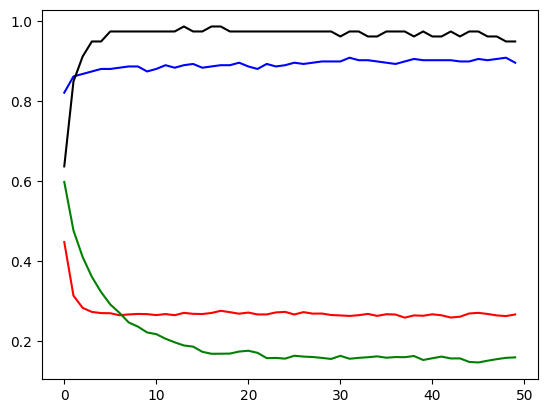

In [63]:
## Visualization

import matplotlib.pyplot as plt

plt.plot(history.history['loss'], color ='red')
plt.plot(history.history['val_loss'], color ='green')
plt.plot(history.history['accuracy'], color ='blue')
plt.plot(history.history['val_accuracy'], color ='black')
plt.show()


In [42]:
## Both are giving good results

In [64]:
# Batch Gradient Descemt >

model1 = Sequential()
model1.add(Dense(10,activation='relu', input_dim=2))
model1.add(Dense(10,activation='relu'))
model1.add(Dense(1,activation='sigmoid'))
model1.summary()


Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 10)                30        
                                                                 
 dense_25 (Dense)            (None, 10)                110       
                                                                 
 dense_26 (Dense)            (None, 1)                 11        
                                                                 
Total params: 151 (604.00 Byte)
Trainable params: 151 (604.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [65]:
## Here We will give batch_size = 320 , as the split is 80-20 split and training data is 80% , total rows =400 , 80% = 320, 20% = 80
## Hence the batch_size = 320

model1.compile(loss = 'binary_crossentropy', metrics = 'accuracy')
start1 = time.time() ## To capture Start Time
history1 = model1.fit(x_scaled, y , epochs = 50, batch_size=320, validation_split = 0.2)
print(time.time()- start1) # To calculate Total Time

Epoch 1/50
1/1 [==============================] - 1s 991ms/step - loss: 0.6112 - accuracy: 0.7469 - val_loss: 0.7584 - val_accuracy: 0.4125
Epoch 2/50
1/1 [==============================] - 0s 36ms/step - loss: 0.6023 - accuracy: 0.7625 - val_loss: 0.7536 - val_accuracy: 0.4250
Epoch 3/50
1/1 [==============================] - 0s 33ms/step - loss: 0.5959 - accuracy: 0.7750 - val_loss: 0.7494 - val_accuracy: 0.4250
Epoch 4/50
1/1 [==============================] - 0s 53ms/step - loss: 0.5906 - accuracy: 0.7812 - val_loss: 0.7456 - val_accuracy: 0.4375
Epoch 5/50
1/1 [==============================] - 0s 42ms/step - loss: 0.5858 - accuracy: 0.7812 - val_loss: 0.7422 - val_accuracy: 0.4625
Epoch 6/50
1/1 [==============================] - 0s 35ms/step - loss: 0.5814 - accuracy: 0.7875 - val_loss: 0.7389 - val_accuracy: 0.4750
Epoch 7/50
1/1 [==============================] - 0s 33ms/step - loss: 0.5773 - accuracy: 0.7875 - val_loss: 0.7357 - val_accuracy: 0.4875
Epoch 8/50
1/1 [==========

In [66]:
# So with Batch Gradient Descent :
# Total Time = 3.0776703357696533 sec
## Training Accuracy = 85%
## Validation Accuracy = 68.75%


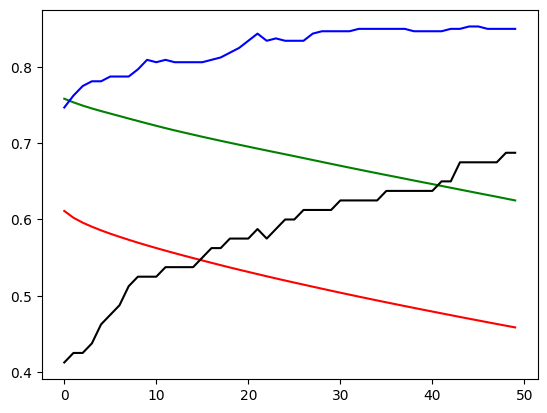

In [67]:
## Visualization

import matplotlib.pyplot as plt

plt.plot(history1.history['loss'], color ='red')
plt.plot(history1.history['val_loss'], color ='green')
plt.plot(history1.history['accuracy'], color ='blue')
plt.plot(history1.history['val_accuracy'], color ='black')
plt.show()

In [68]:
## Mini Batch Gradient Descent

model2 = Sequential()
model2.add(Dense(10,activation='relu', input_dim=2))
model2.add(Dense(10,activation='relu'))
model2.add(Dense(1,activation='sigmoid'))
model2.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_27 (Dense)            (None, 10)                30        
                                                                 
 dense_28 (Dense)            (None, 10)                110       
                                                                 
 dense_29 (Dense)            (None, 1)                 11        
                                                                 
Total params: 151 (604.00 Byte)
Trainable params: 151 (604.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [69]:
## batch_size = 64

model2.compile(loss = 'binary_crossentropy', metrics = 'accuracy')
start2 = time.time() ## To capture Start Time
history2 = model2.fit(x_scaled, y , epochs = 50, batch_size=64, validation_split = 0.2)
print(time.time()- start2) # To calculate Total Time

Epoch 1/50
5/5 [==============================] - 1s 46ms/step - loss: 0.6507 - accuracy: 0.8531 - val_loss: 0.6694 - val_accuracy: 0.7625
Epoch 2/50
5/5 [==============================] - 0s 14ms/step - loss: 0.6323 - accuracy: 0.8469 - val_loss: 0.6660 - val_accuracy: 0.6625
Epoch 3/50
5/5 [==============================] - 0s 14ms/step - loss: 0.6200 - accuracy: 0.8531 - val_loss: 0.6623 - val_accuracy: 0.6125
Epoch 4/50
5/5 [==============================] - 0s 14ms/step - loss: 0.6097 - accuracy: 0.8500 - val_loss: 0.6590 - val_accuracy: 0.6250
Epoch 5/50
5/5 [==============================] - 0s 10ms/step - loss: 0.5998 - accuracy: 0.8562 - val_loss: 0.6553 - val_accuracy: 0.6250
Epoch 6/50
5/5 [==============================] - 0s 14ms/step - loss: 0.5903 - accuracy: 0.8594 - val_loss: 0.6514 - val_accuracy: 0.6250
Epoch 7/50
5/5 [==============================] - 0s 10ms/step - loss: 0.5810 - accuracy: 0.8625 - val_loss: 0.6478 - val_accuracy: 0.6125
Epoch 8/50
5/5 [===========

In [ ]:
# So with Mini Batch Gradient Descent :
# Total Time = 4.032975435256958 sec
## Training Accuracy = 86.87%
## Validation Accuracy = 77.50%


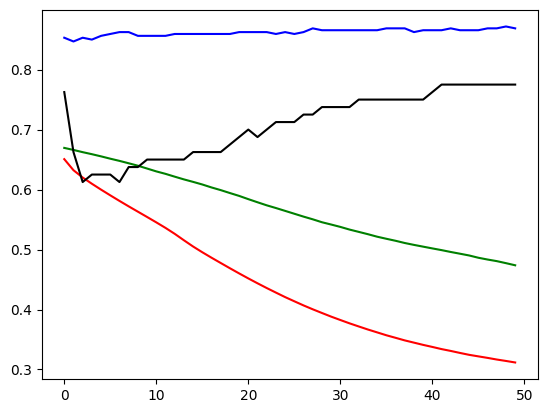

In [70]:
## Visualization

import matplotlib.pyplot as plt

plt.plot(history2.history['loss'], color ='red')
plt.plot(history2.history['val_loss'], color ='green')
plt.plot(history2.history['accuracy'], color ='blue')
plt.plot(history2.history['val_accuracy'], color ='black')
plt.show()

In [ ]:
## On comparing

## SGD : Total Time = 82.36621451377869 ,  Training Accuracy = 89.69% , Validation Accuracy = 95.00%
# MBGD : Total Time = 4.032975435256958 sec , Training Accuracy = 86.87%  , Validation Accuracy = 77.50%
# BGD : Total Time = 3.0776703357696533 sec , Training Accuracy = 85% , Validation Accuracy = 68.75%

## On the Basis of Time : BGD is best
## On the Bais of Accuracy :  SGD is best
## MBGB falls in the mid.
## So we prefer MBGD is better that BGD in terms of performace and better that SGM in time complexity.